In [56]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve,roc_auc_score,accuracy_score, classification_report, confusion_matrix, precision_score, f1_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
path = '/Users/raisaurabh04/OneDrive/GreyAtom/Practice Dataset/Banknote_authentication_dataset_logreg.csv'

In [3]:
data = pd.read_csv(path)

data.shape

data.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [4]:
def sigmoid(x) :
    return 1/(1 + np.exp(x))

result = sigmoid(0)

result

0.5

In [5]:
X = data.iloc[ : , : -1]
y = data.iloc[ : , -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

scalar = MinMaxScaler()

# for columns in X_train :
#     scalar.fit(X_train[[columns]])
    

# for columns in X_test :
#     X_test[columns] = scalar.fit_transform(X_test[[columns]])

scalar.fit(X_train)
X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)

model = LogisticRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [6]:
def metric_calculation(y_test, y_pred) :
    acc_score = accuracy_score(y_test, y_pred)
    cf = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return cf, acc_score, precision, recall, f1

cf, acc, precision, recall, f_score = metric_calculation(y_test, y_pred)

print(cf, acc, precision, recall, f_score, sep = '\n')

[[144   4]
 [ 14 113]]
0.9345454545454546
0.9658119658119658
0.889763779527559
0.9262295081967213


In [7]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       148
           1       0.97      0.89      0.93       127

   micro avg       0.93      0.93      0.93       275
   macro avg       0.94      0.93      0.93       275
weighted avg       0.94      0.93      0.93       275



In [8]:
roc_auc_score(y_test, y_pred)

0.9313683762502661




# Logistic Regression Assessment

In [9]:
path = '/Users/raisaurabh04/OneDrive/GreyAtom/Practice Dataset/insurance2_logreg.csv'

In [10]:
df = pd.read_csv(path)

df.head()

X = df.iloc[ : , : -1]
y = df.iloc[ : , -1]

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 6)

In [11]:
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


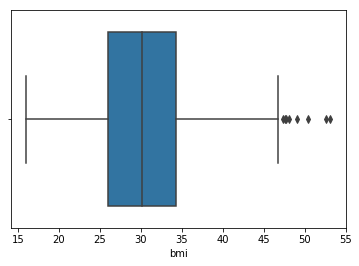

1    608
0    462
Name: insuranceclaim, dtype: int64

In [12]:
sns.boxplot(x = 'bmi', data = X_train)
plt.show()

q_value = X_train['bmi'].quantile(q = 0.95)

y_train.value_counts()

               age       sex       bmi  children    smoker    region   charges
age       1.000000 -0.026319  0.091499  0.061800 -0.012933  0.006400  0.316429
sex      -0.026319  1.000000  0.047436  0.032628  0.074341  0.018674  0.057600
bmi       0.091499  0.047436  1.000000  0.033350  0.005660  0.158037  0.197609
children  0.061800  0.032628  0.033350  1.000000  0.021243  0.027956  0.088766
smoker   -0.012933  0.074341  0.005660  0.021243  1.000000  0.006970  0.778644
region    0.006400  0.018674  0.158037  0.027956  0.006970  1.000000 -0.001329
charges   0.316429  0.057600  0.197609  0.088766  0.778644 -0.001329  1.000000


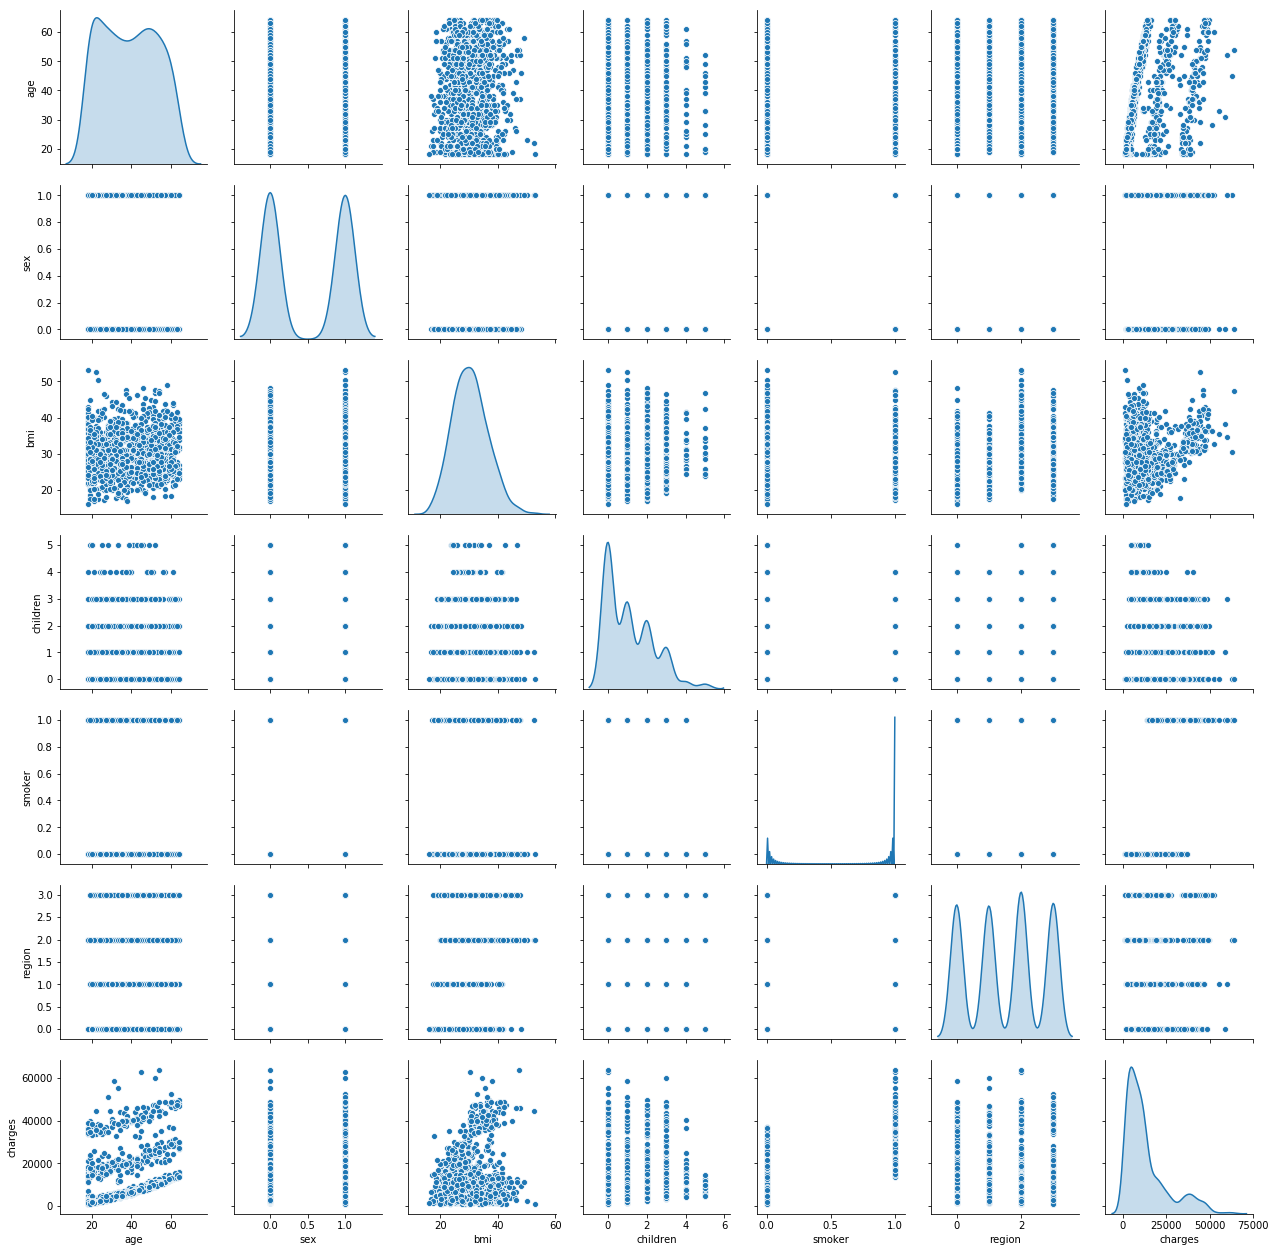

In [13]:
relation = X_train.corr()

print(relation)

sns.pairplot(data=X_train,diag_kind="kde")
plt.show()

In [18]:
cols = ['children','sex','region','smoker']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
for i, j in np.ndindex(axes.shape):
    col = cols[2 * i + j]
    sns.countplot(x=X_train[col], hue=y_train, ax=axes[i, j])
    axes[i, j].set(title = 'Countplot of {}'.format(col))
plt.show()

In [36]:
parameters = {'C':[0.1,0.5,1,5]}

lr = LogisticRegression()

grid = GridSearchCV(estimator=lr, param_grid=parameters)

grid.fit(X_train, y_train)

y_pred = grid.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(accuracy)

0.8544776119402985


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be change

In [35]:
cf, acc, precision, recall, f_score = metric_calculation(y_test, y_pred)

print(cf, acc, precision, recall, f_score, sep = '\n')

[[ 69  24]
 [ 15 160]]
0.8544776119402985
0.8695652173913043
0.9142857142857143
0.8913649025069638


In [37]:
score = roc_auc_score(y_test, y_pred)

score

grid.predict_proba(X_test)

y_pred_proba = pd.DataFrame(grid.predict_proba(X_test))[1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(10,8))
plt.plot(fpr,tpr,label="Logistic model, auc="+str(roc_auc))
plt.show()